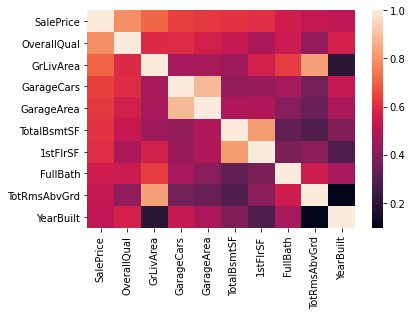

In [132]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

def cost(X,y,w):
    N = len(y)
    prediction = X.dot(w)

    cost = (1/2*N)*np.sum(np.square(y-prediction))
    return  cost
def gradient_descent(X, y, w, learning_rate=0.001, iterations=10000):
    N = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):

        prediction = np.dot(X,w)

        w = w -(1/N)*learning_rate*( X.T.dot((prediction - y)))
        cost_history[it]  = cost(X,y,w)
    return w,cost_history

df = pd.read_csv("train.csv")




cols = df.corr().nlargest(10,'SalePrice')['SalePrice'].index

corr = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(corr,yticklabels=cols.values, xticklabels=cols.values)


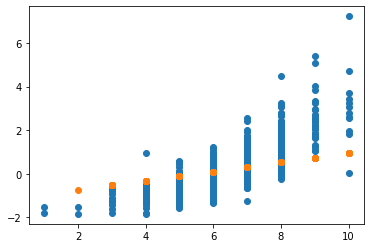

In [97]:
#нормализация



df_norm = pd.read_csv("train.csv")
df_norm['SalePrice'] = df_norm['SalePrice'].apply(lambda x:(x -df_norm['SalePrice'].mean())/ np.std(df_norm['SalePrice']) )
ones = [[1]]*df['SalePrice'].shape[0]
ones = np.array(ones)
X = []
for i in df_norm['OverallQual'].values:
    X.append([i])



# Y
y= df_norm['SalePrice']
y_training = y[:1000]
y = y[1000:1460]




#X
X = np.hstack((ones, X))
X_training = X[:1000]
X = X[1000:1460]


#Обучение
w = [np.random.random(),np.random.random()]
w,cost_history = gradient_descent(X_training,y_training, w)


predicts = X.dot(w)


#Вывод
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_training[:,1], y_training)
ax.scatter(X[:,1], predicts)






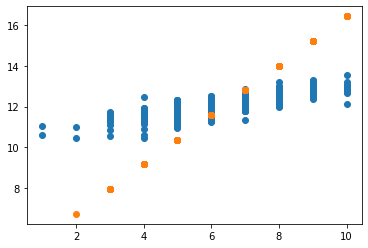

In [131]:

#логарифм
df_log = pd.read_csv("train.csv")
df_log['SalePrice'] = np.log1p(df_log['SalePrice'])
ones = [[1]]*df['SalePrice'].shape[0]
ones = np.array(ones)
X = []
for i in df_norm['OverallQual'].values:
    X.append([i])



# Y
y= df_log['SalePrice']
y_training = y[:1000]
y = y[1000:1460]



#X
X = np.hstack((ones, X))
X_training = X[:1000]
X = X[1000:1460]


#Обучение 
w = [np.random.random(),np.random.random()]
w,cost_history = gradient_descent(X_training,y_training, w)


predicts = X.dot(w)

#Вывод
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_training[:,1], y_training)
ax.scatter(X[:,1], predicts)



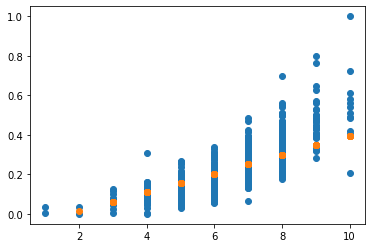

In [127]:
#minmax

df_minmax = pd.read_csv("train.csv")
df_minmax['SalePrice'] = df_minmax['SalePrice'].apply(lambda x:(x -df_minmax['SalePrice'].min())/(df_minmax['SalePrice'].max() - df_minmax['SalePrice'].min()) )
ones = [[1]]*df['SalePrice'].shape[0]
ones = np.array(ones)
X = []
for i in df_minmax['OverallQual'].values:
    X.append([i])



# Y
y= df_minmax['SalePrice']
y_training = y[:1000]
y = y[1000:1460]



#X
X = np.hstack((ones, X))
X_training = X[:1000]
X = X[1000:1460]


#Обучение 
w = [np.random.random(),np.random.random()]
w,cost_history = gradient_descent(X_training,y_training, w)


predicts = X.dot(w)
#Вывод
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X_training[:,1], y_training)
ax.scatter(X[:,1], predicts)


In [122]:
Данные ,нормированные с помощью функции нормализации (вычитание среднего и деление на вариацию),лучшего всего подходят для обучения модели ,нормированные логарифом - хуже всех (оно и не удивительно)


Так же я заметил,что результат обучения на данных,нормированных минимаксом ,сильно,почему-то,  зависит от начального значения  весов .Доходит даже до того,что график ф-ции не растет,а падает

SyntaxError: invalid syntax (<ipython-input-122-fd10dc6203dd>, line 1)